In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/project-4-dataset/Basket_dataset (1).csv")

df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Data types
data_types = df.dtypes
print("\nData Types:\n", data_types)

# Summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Unique values
unique_values = df.nunique()
print("\nUnique Values:\n", unique_values)


Missing Values:
 Member_number      0
Date               0
itemDescription    0
dtype: int64

Data Types:
 Member_number       int64
Date               object
itemDescription    object
dtype: object

Summary Statistics:
        Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000

Unique Values:
 Member_number      3898
Date                728
itemDescription     167
dtype: int64


In [3]:
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame named df

# Display data types of all columns
print(df.dtypes)

import pandas as pd

# Assuming df is your DataFrame containing the 'Date' column in object format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Now 'Date' column is in datetime format
print(df.dtypes)


Member_number       int64
Date               object
itemDescription    object
dtype: object
Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object


In [4]:
# Save the DataFrame to a CSV file
df.to_csv('output_dataset.csv', index=False)


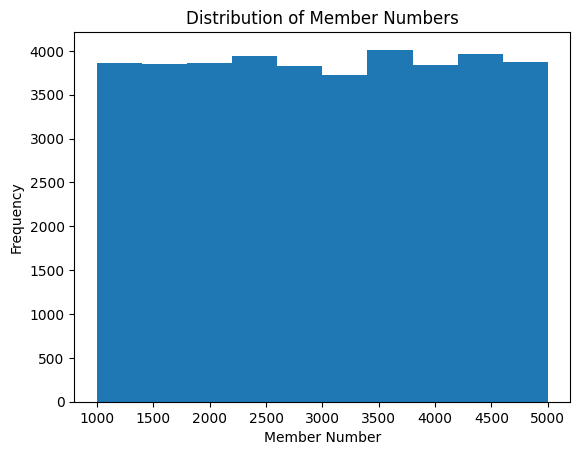

In [8]:
import matplotlib.pyplot as plt

# Data visualization
plt.hist(df['Member_number'])
plt.title('Distribution of Member Numbers')
plt.xlabel('Member Number')
plt.ylabel('Frequency')
plt.show()

# Elimination of redundant variables (if any)
# In this case, 'Date' might not be necessary for initial analysis
#df = df.drop(columns=['Date'])


In [9]:
df.head()

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk


In [10]:
df["Date"]

0        21/07/2015
1        05/01/2015
2        19/09/2015
3        12/12/2015
4        01/02/2015
            ...    
38760    08/10/2014
38761    23/02/2014
38762    16/04/2014
38763    03/12/2014
38764    26/12/2014
Name: Date, Length: 38765, dtype: object

In [12]:
# Simulating RFM Segmentation
# Recency: How recently a customer made a purchase
# Frequency: How often a customer makes a purchase
# Monetary: How much money a customer spends

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate Recency, Frequency, and Monetary values
current_date = pd.to_datetime('2024-04-28')  # Assuming current date is 28th April 2024
rfm = df.groupby('Member_number').agg({
    'Date': lambda date: (current_date - date.max()).days,  # Recency
    'itemDescription': 'count',  # Frequency
}).rename(columns={'Date': 'Recency', 'itemDescription': 'Frequency'})

# Assuming we don't have monetary values in the dataset
# RFM Model might need modification based on the actual dataset
print(rfm)


               Recency  Frequency
Member_number                    
1000              3077         13
1001              3284         12
1002              3164          8
1003              3365          8
1004              3070         21
...                ...        ...
4996              3078         10
4997              3045          6
4998              3119          2
4999              3046         16
5000              3365          7

[3898 rows x 2 columns]


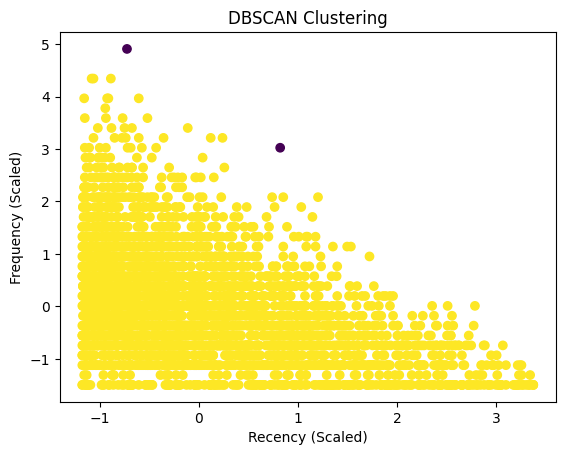

             Recency  Frequency
Cluster                        
-1       3237.500000  31.000000
 0       3229.697382   9.934035


In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'Recency' and 'Frequency' are the features for clustering
X = rfm[['Recency', 'Frequency']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example values for epsilon and min_samples
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the RFM dataframe
rfm['Cluster'] = clusters

# Visualize the clusters (for 2D data)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Recency (Scaled)')
plt.ylabel('Frequency (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

# Cluster interpretation
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean'
})
print(cluster_profiles)
